<a href="https://colab.research.google.com/github/ik-okoro/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_t_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Data Science Unit 1 Sprint 2 Module 1*

# T-tests (Inferential Statistics)

## Learning Objectives
- Student can explain the purpose of and be able to identify opportunities and applications for t-tests
- Student can set up and run a one-sample t test on a sample
- Student can set up and run a two-sample t test comparing two samples
- Studen can use a p-value to draw the correct conclusion about the null and alternative hypothesis and give a written conclusion

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [1]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [ ]:
# How can we quickly look at some descriptive statistics of the above dataframe?

In [2]:
df.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


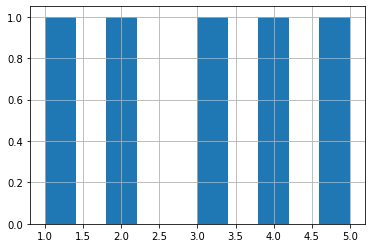

In [3]:
df["a"].hist();

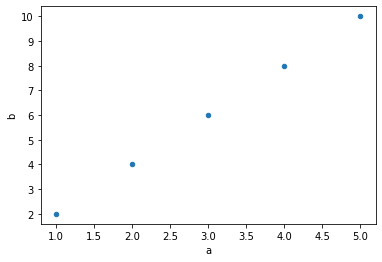

In [4]:
df.plot.scatter("a", "b");

## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

## Hypothesis Testing (T-Tests)

Drawing conclusions based on probability in the face of randomness



Is the sample reflective of our concept of the population?

In [17]:
# Coinflips example - What is the population?

import numpy as np

coinflips = np.random.binomial(n=1, p=0.5, size=1000)

coinflips

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [18]:
df = pd.DataFrame({"coinflips" : coinflips})

df.head()

,coinflips
0,1
1,0
2,1
3,1
4,1


<function matplotlib.pyplot.show>

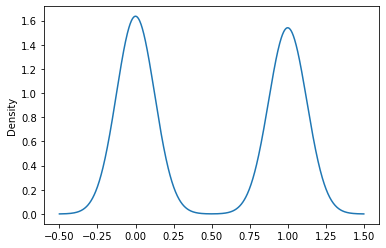

In [19]:
import matplotlib.pyplot as plt

df["coinflips"].plot.density()
plt.show

In [ ]:
dir(np.random)

In [20]:
# I can take a sample size as big as I want with numpy

coinflips = np.random.binomial(n=1, p=0.5, size=10)

coinflips

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

If we repeat the sampling why does our estimate of the mean move around so much? 

In [27]:
# Coinflips example - See the implications of randomness

coinflips = np.random.binomial(n=1, p=0.5, size=10)

coinflips.mean()

0.3

What happens as I increase the sample size? The sample mean deviates less from the...?

In [28]:
# More Information -> Greater Confidence in the face of randomness

coinflips = np.random.binomial(n=1, p=0.5, size=200)

coinflips.mean()

0.525

### The bigger the sample size, the more close my sample means will be to the population value (.5). The more information "data" I collect, the more confident I will be that my sample is truly reflective of the population.

![Standard Error of the Sample  Mean](https://jungminded.weebly.com/uploads/1/3/5/8/13582285/7285766_orig.jpeg?160)

**Conclusion: As our sample size goes up, our estimates (of the mean in this case) get more precise, allowing us to infer things about the population with greater confidence.**



## One Sample T-test

What if I didn't have a fair coin?

Comparing information from a sample against our concept of the population.

![One Sample T Statistic](https://www.statisticshowto.com/wp-content/uploads/2015/09/t-score.jpg)

$\overline{x}$ = Sample Mean

$\mu$ = Population Mean

$\text{s}$ = sample standard deviation

$\text{n}$ = sample size

$\text{SE}$ = an abbreviation for "Standard Error"

The standard error tells us how much our sample mean might wiggle around and deviate from the population value. The bigger the sample size, the smaller the standard error and the less our sample mean wiggles around. In other words, the more confident I can be that our sample mean is reflective of the population mean.

## The T-test Process:

To calculate the probability of some hypothesis being true or not.

Hypothesis is like a "claim" that we're making about a population.

We collect a sample, and then test whether or not that sample confirms or contradicts our hypothesis.

###1) Null Hypothesis:

Informed by our "concept of the population"

Generally speaking coins are fair - so that becomes our "null" hypothesis

My sample mean is equal to my population mean (.5)

This is a fair coin.

###2) Alternative Hypothesis:

My sample mean is not equal to my population mean(.5)

This is an unfair coin.

###3) Confidence Level:

We're going to give the null hypothesis the benefit of the doubt.

How certain do I need to be that the alternative hypothesis is true, before I'm willing to reject the null hypothesis

**95% Confidence Level** - We need to be 95% confident (or have a 95% probability of the alternative hypothesis being true before we will reject the null hypothesis).

Brian makes a claim: THIS IS A FAIR COIN!

I want to verify if that claim is true or not

In [29]:
from scipy import stats

In [35]:
# Lets use a tool called a t-test to test if this is a fair coin or not
# Generate a sample

coinflips = np.random.binomial(n=1, p=0.6, size=20)

coinflips

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [36]:
# Run a 1-sample t-test
# Pass in your whole sample, and hypothesized population value (null hypothesis value)

stats.ttest_1samp(coinflips, .5)

Ttest_1sampResult(statistic=1.3708103001950633, pvalue=0.18641143545847969)

###t-statistic: 
Quantifies how different our sample mean is from our population mean. The bigger the t-statistic, the more different they are.

###P-value:
The probability that the **null hypothesis** is true, **given** the sample that we have collected.

1 - p-value = The likelihood  of the alternative hypothesis being true

I will **fail to reject** the null hypothesis if the p-value >= .05

I will **reject** the null hypothesis if the p-value is < .05

### Conclusion:

Due to a t-statistic of 1.37 and a p-value of 0.186, I **fail to reject** the null hypothesis.

### What baout a bigger sample size?

In [37]:
coinflips = np.random.binomial(n=1, p=0.6, size=200)

coinflips

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0])

In [38]:
stats.ttest_1samp(coinflips, .5)

Ttest_1sampResult(statistic=4.599684448308066, pvalue=7.519764940699047e-06)

### Conclusion:
Due to a t-statistic of 4.6 and a p-value of 7.5e-06, I **reject** the null hypothesis that this is a fair coin and suggest the alternative, that it is an unfair coin.

## Two Sample T-test

Comparing two groups or samples against each other rather than a single sample against a population. 



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



You will alwas have the same null hypothesis with a 2-sample t-test.

Always that the two sample means are equal

### Null Hypothesis:

The average cooking times on the two burners are the same:

$H_0: \overline{x}_1 == \overline{x}_2$

### Alternative Hypothesis: 

The average cooking times on the two burners are different:

$H_0: \overline{x}_1 \neq \overline{x}_2$

### Confidence Level: 95%

In [39]:
xbar1 = 180
s1 = 5

xbar2 = 178.5
s2 = 4.25

sample1 = np.random.normal(xbar1, s1, 1000)
sample2 = np.random.normal(xbar2, s2, 800)

In [40]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=6.673796486931707, pvalue=3.30963776318524e-11)

### Conclcusion:

Based on a t-statistic of 6.67 and a p-value of 3.3e-11, I **reject** the null hypothesis that pancake cooking times between the two burners are equal.

I suggest the alternative that the cooking times are different.

**Large sample sizes allow us to detect small yet significant differences between our two samples.**

## Lets Practice more 1-sample and 2-sample T-tests

Using the dataset that you will be using on your assignment

In [41]:
# Let's do it!
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-09-07 17:48:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-09-07 17:48:22 (278 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [45]:
column_headers = ["party", "handicapped-infants", "water-project", "budget", 
                 "physician-fee-freeze", "el-salvador-aid", "religious-groups", 
                 "anti-satellite-ban", "aid-to-contras", "mx-missile", "immigration", 
                 "synfuels", "education", "right-to-sue", "crime", "duty-free", "south-africa"]

df = pd.read_csv("house-votes-84.data", names=column_headers)

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


### Categorical Encoding:

We replace the different categories with integers

In [46]:
df = df.replace({"y" : 1, "n" : 0, "?" : np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [ ]:
df.describe()

In [50]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

## 1-sample t-test example

Test claims about the levels of congressional support for the education bill

What is our population?

In [48]:
# Take sample from this population
# Pull rows at random from the dataset
sample = df.sample(20, random_state=42)

sample.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
280,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
78,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
113,republican,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
253,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
324,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


### Null Hypothesis:

Congressional levels of support for the `education` bill are equal to .5 (or 50% vote in support)

## Alternative Hypothesis:
Congressional levels of support for the `education` bill are not equal to .5 (or 50% vote in support)

### Confidence Level: 99%

High confidence levels: large sample size or high stakes claim

In [51]:
stats.ttest_1samp(sample["education"], .5, nan_policy="omit")

Ttest_1sampResult(statistic=0.6784005252999684, pvalue=0.5061465835201628)

p-value < .01 -> reject
p-value >= .01 -> fail to reject

### Conclusion:

Based on a t-statistic of .678 and a p-value of .5, I **fail to reject** the null hypothesis that congressional levels of support for the education bill are equal to 50%

In [53]:
# Population mean
df["education"].mean()

0.42326732673267325

Would be able to reject with a larger sample size of 200

## Two-sample T-test

In [55]:
# Use dataframe filtering to create two samples based on the different parties

rep = df[df["party"] == "republican"]
dem = df[df["party"] == "democrat"]

In [56]:
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [57]:
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


### Null Hypothesis:

Republican support for the `immigration` bill is equal to democrat levels of support for the `immigration` bill.

### Alternative Hypothesis:

Republican support for the `immigration` bill is not equal to democrat levels of support for the `immigration` bill.


### Confidence Level: 95%

In [58]:
stats.ttest_ind(dem["immigration"], rep["immigration"], nan_policy="omit")

Ttest_indResult(statistic=-1.7359117329695164, pvalue=0.08330248490425066)

## Conclusion:

Based on a t-statistic of -1.74 and a p-value of .08, I **fail to reject** the null hypothesis that republican levels of support is equal to the democrat levels of support for the `immigration` bill.


Which party support this bill more than the other?

1) Print out their sample means

In [59]:
dem["immigration"].mean()

0.4714828897338403

In [60]:
rep["immigration"].mean()

0.5575757575757576

2) Look at the sign of the t-statistic.

If the t-statistic is posititive, then the left-hand sample mean is larger.

If the t-statistic is negative, then the right-hand sample mean is larger.

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means